In [4]:
import requests
from urllib.request import urlopen

from bs4 import BeautifulSoup # HTTP Response ->   HTML

import pandas as pd
from datetime import datetime
import time
import re

In [6]:
# https://search.naver.com/search.naver?where=news&sm=tab_jum&query=데이터분석
# 분석할 주소 주소창에 공백을 두고 복사하면 한글이 안깨짐(아스키코드 처리)

In [7]:
# 뉴스 검색 결과에서 네이버뉴스 추려내기

query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query

In [8]:
#web = urlopen(url)
print(url) # url에 한글이 껴 있을 경우 에러가 뻥

https://search.naver.com/search.naver?where=news&query=데이터분석


b'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xeb\xb6\x84\xec\x84\x9d : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xeb\xb6\x84\xec\x84\x9d\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xeb\xb6\x84\xec\x84\x9d\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\x
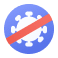
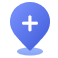
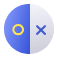
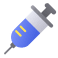

In [9]:
web = requests.get(url).content
print(web)

In [10]:
# get <- HTTP Requesr 중 GET method requesr (GET / POST / PUT / DELETE)

web = requests.get(url).content
source = BeautifulSoup(web,'html.parser')
# print(source) 그대로 출력할 경우, 텍스트가 많아서 버벅임

In [11]:
# find

news_subjects = source.find_all('a', {'class':'news_tit'}) # ResultSet

subject_list = []

for subject in news_subjects:
    subject_list.append(subject.get_text())
    
print(subject_list)

["요일·날씨 빅데이터 활용 '최적 화물운임' 제공 AI기술 개발", '심평원 가명정보 결합데이터, 서울에서도 분석 가능해져', '‘깡통전세 막아라’…전·월세 데이터 공개로 세입자 권리 보장한다', '티맵서 전국 75만개 ‘맛집 데이터’ 확인한다', 'AI·빅데이터, 호주 일상 바꾸나…국가 생산성 제고책 공개', 'KT 케이딜, 빅데이터 분석해 추석 선물 추천한다', '에이텐, KB그룹 데이터 한 화면에 모았다', "한국무역통계진흥원, 2022년 '농식품 맞춤형 무역통계 데이터' 개방", '政, 코로나19 빅데이터 개방 플랫폼 구축', "델 테크놀로지스, 클라우드 경험 이식한 '에이펙스 데이터 스토리지' 출시"]


In [12]:
# 뉴스 안으로 들어가서 본문의 내용 활용

urls = news_subjects
first_article = urls[0]

first_article.attrs['href']

'http://www.newsis.com/view/?id=NISX20220824_0001988599&cID=14001&pID=14000'

In [13]:
for urls in source.find_all('a',{'class' : 'news_tit'}):
    #print(urls.attrs['href'])
    print(urls['href']) # 동일

http://www.newsis.com/view/?id=NISX20220824_0001988599&cID=14001&pID=14000
https://www.news1.kr/articles/4781818
http://news.heraldcorp.com/view.php?ud=20220823000059
https://it.chosun.com/site/data/html_dir/2022/08/24/2022082400891.html
https://www.yna.co.kr/view/AKR20220824069900093?input=1195m
http://theviewers.co.kr/View.aspx?No=2509516
https://zdnet.co.kr/view/?no=20220823161841
http://www.kdpress.co.kr/news/articleView.html?idxno=114693
https://www.dailymedi.com/news/news_view.php?wr_id=887762
http://www.itdaily.kr/news/articleView.html?idxno=209727


In [14]:
# 각 뉴스 페이지 마다 소스 코드가 다르다!
# 언론사에 맞는(웹페이지 별로) if문으로 체크한 후 해당하는
# 언론사의 맞는 함수로 또 빼주어야 한다.
# 네이버 뉴스는 자체 플랫폼으로 옮겨 놓아 다행이다.

In [15]:
for urls in source.find_all('a',{'class' : 'info'}):
    if len(urls.attrs['class']) == 1:
        print(urls.attrs['href'])

https://n.news.naver.com/mnews/article/003/0011379817?sid=102
https://n.news.naver.com/mnews/article/421/0006294447?sid=102
https://n.news.naver.com/mnews/article/016/0002031577?sid=101
https://n.news.naver.com/mnews/article/001/0013394760?sid=104
https://n.news.naver.com/mnews/article/092/0002266114?sid=105


In [16]:
sample_url = 'https://n.news.naver.com/mnews/article/079/0003677014?sid=102'
sample_url.startswith('https://n.news.naver.com/')

True

In [17]:
urls_list = [] # 네이버뉴스 링크만 모아낼 리스트

for urls in source.find_all('a',{'class' : 'info'}):
    if urls.attrs['href'].startswith('https://n.news.naver.com/'):
        urls_list.append(urls.attrs['href'])

urls_list

['https://n.news.naver.com/mnews/article/003/0011379817?sid=102',
 'https://n.news.naver.com/mnews/article/421/0006294447?sid=102',
 'https://n.news.naver.com/mnews/article/016/0002031577?sid=101',
 'https://n.news.naver.com/mnews/article/001/0013394760?sid=104',
 'https://n.news.naver.com/mnews/article/092/0002266114?sid=105']

In [18]:
# 아래 코드를 실행하면 네이버에서 Bot으로  인식하여 접속을 차단하므로 'ConnectionError' 발생
web_news = requests.get(urls_list[0]).connect
source_news = BeautifulSoup(web_news,'html.parser')

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))

In [27]:
# 따라서 아래와 같이 코드를 수정하여 크롬브라우저에서 
# 보내는 요청으로 인식하도록 HTTP Request 에 Header 정보를 추가해주면 된다.
# Ctrl+Shift+I -> NetWork Request Header -> user agent
from urllib.parse import quote
headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36where: newssm: tab_jumquery: ' + quote('데이터분석')}

web_news = requests.get(urls_list[0], headers=headers).content

source_news = BeautifulSoup(web_news,'html.parser')

source_news

<!DOCTYPE html>

<html data-useragent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36where: newssm: tab_jumquery: %EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport">
<meta content="요일·날씨 빅데이터 활용 '최적 화물운임' 제공 AI기술 개발" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://n.news.naver.com/mnews/article/003/0011379817?sid=102" property="og:url"/>
<meta content="https://imgnews.pstatic.net/image/003/2022/08/24/NISI20220824_0001069300_web_20220824095317_20220824095904189.jpg" property="og:image"/>
<meta content="기사내용 요약 경기도 지역협력연구센터 장태우 경기대 산업경영공학과 교수팀 민간기업 ㈜화물맨과 10월 중개서비스 제공 예정 [수원=뉴시스]박상욱 기자 = 경기도의 산학협력 지원을 받은 국내 연구팀이 요일과 운송시각, " property="og:description"/>
<meta content="뉴시스 | 네이

In [30]:
title = source_news.find('h2', {'class':'media_end_head_headline'}).get_text()
print(title)

요일·날씨 빅데이터 활용 '최적 화물운임' 제공 AI기술 개발


In [49]:
date = source_news.find('span', {'class' : 'media_end_head_info_datestamp_time _ARTICLE_DATE_TIME'}).get_text()

print(date)

2022.08.24. 오전 9:58


In [50]:
date = source_news.find('span', {'class' : 'media_end_head_info_datestamp_time _ARTICLE_DATE_TIME'}).get_text()
print(date)
date = date.replace(" ","") # 공백제거
print(date)
date1 = date[:11] #날짜까지 파싱
date2 = date[13:] #시간부분 파싱
date3 = (lambda x : 'am' if x == '오전' else 'pm')(date[11:13])
date4 = date1 + date2 + date3
date = pd.Timestamp(date4)
print(date1)
print(date2)
print(date3)
print(date4)
print(date)
print(type(date))



2022.08.24. 오전 9:58
2022.08.24.오전9:58
2022.08.24.
9:58
am
2022.08.24.9:58am
2022-08-24 09:58:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [51]:
# 기사 본문
article = source_news.find('div', {'id':'dic_area'}).get_text()
article # 필요없는 문자들이 몇몇 보임

'\n기사내용 요약경기도 지역협력연구센터 장태우 경기대 산업경영공학과 교수팀민간기업 ㈜화물맨과 10월 중개서비스 제공 예정\n\n\n\n화물운송 중개서비스 모바일 앱. (사진=경기도 제공) *재판매 및 DB 금지[수원=뉴시스]박상욱 기자 = 경기도의 산학협력 지원을 받은 국내 연구팀이 요일과 운송시각, 날씨 등 200만 건에 달하는 빅데이터를 활용해 적정한 화물운임을 제공하는 인공지능(AI) 기술개발에 성공했다.24일 경기도에 따르면 경기도 지역협력연구센터(GRRC)에서 연구를 수행하고 있는 장태우 경기대 산업경영공학과 교수팀은 이런 내용을 담은 화물운송 중개 고도화 서비스를 개발, 민간기업과 함께 서비스 제공을 준비 중이다.국내 화물운송 시장에는 표준화된 운임이 정해져 있지 않아 화물운송을 위탁하는 화주와 실제 운송을 책임지는 차주 사이에 입장 차이가 존재한다. 정량화된 운임 정책이 없는 만큼 운임 책정이 저평가되는 경우가 많고, 이는 고스란히 차주의 손실로 이어진다.경기대 연구팀은 200여만 개의 화물 요금 관련 데이터를 활용해 요일과 날씨는 물론 무게, 거리 등 70여 개의 요금 결정 요인을 고려해 합리적인 운송요금을 도출하는 데 성공했다. 어떤 화물을 어디로 운송할 것인지의 주요 요인을 입력하면 기존 데이터에 비춰볼 때 85% 이상 정확한 운송요금을 제시할 수 있게 됐다. 연구팀은 해당 내용의 국제학술지 게재도 추진하고 있다.연구팀의 인공지능(AI) 기술은 현재 화물운송 중개 플랫폼 회사인 ㈜화물맨에 적용돼 표준 화물운임 제공 서비스를 위한 모바일 애플리케이션을 개발 중이다.\n\n\n\n화물운송 중개서비스 모델 흐름도. (사진=경기도 제공) *재판매 및 DB 금지두 기관은 현재 차주에게 적합한 화물운송 상품을 추천해주는 기술과 데이터 분석 결과를 효율적으로 시각화하는 기술을 개발 중으로, 시험운영 등을 거쳐 이르면 올해 10월 정도에 서비스를 제공할 계획이다.김규식 경기도 미래성장정책관은 "이번 기술 개발은 인공지능, 빅데이터 등 첨단기술을 활용해 기

In [53]:
article = article.replace('\n',"") # 교체
article = article.strip() # 양 쪽의 여백 제거
article

'기사내용 요약경기도 지역협력연구센터 장태우 경기대 산업경영공학과 교수팀민간기업 ㈜화물맨과 10월 중개서비스 제공 예정화물운송 중개서비스 모바일 앱. (사진=경기도 제공) *재판매 및 DB 금지[수원=뉴시스]박상욱 기자 = 경기도의 산학협력 지원을 받은 국내 연구팀이 요일과 운송시각, 날씨 등 200만 건에 달하는 빅데이터를 활용해 적정한 화물운임을 제공하는 인공지능(AI) 기술개발에 성공했다.24일 경기도에 따르면 경기도 지역협력연구센터(GRRC)에서 연구를 수행하고 있는 장태우 경기대 산업경영공학과 교수팀은 이런 내용을 담은 화물운송 중개 고도화 서비스를 개발, 민간기업과 함께 서비스 제공을 준비 중이다.국내 화물운송 시장에는 표준화된 운임이 정해져 있지 않아 화물운송을 위탁하는 화주와 실제 운송을 책임지는 차주 사이에 입장 차이가 존재한다. 정량화된 운임 정책이 없는 만큼 운임 책정이 저평가되는 경우가 많고, 이는 고스란히 차주의 손실로 이어진다.경기대 연구팀은 200여만 개의 화물 요금 관련 데이터를 활용해 요일과 날씨는 물론 무게, 거리 등 70여 개의 요금 결정 요인을 고려해 합리적인 운송요금을 도출하는 데 성공했다. 어떤 화물을 어디로 운송할 것인지의 주요 요인을 입력하면 기존 데이터에 비춰볼 때 85% 이상 정확한 운송요금을 제시할 수 있게 됐다. 연구팀은 해당 내용의 국제학술지 게재도 추진하고 있다.연구팀의 인공지능(AI) 기술은 현재 화물운송 중개 플랫폼 회사인 ㈜화물맨에 적용돼 표준 화물운임 제공 서비스를 위한 모바일 애플리케이션을 개발 중이다.화물운송 중개서비스 모델 흐름도. (사진=경기도 제공) *재판매 및 DB 금지두 기관은 현재 차주에게 적합한 화물운송 상품을 추천해주는 기술과 데이터 분석 결과를 효율적으로 시각화하는 기술을 개발 중으로, 시험운영 등을 거쳐 이르면 올해 10월 정도에 서비스를 제공할 계획이다.김규식 경기도 미래성장정책관은 "이번 기술 개발은 인공지능, 빅데이터 등 첨단기술을 활용해 기업들의 어려움을 해결했다는 데 큰

In [ ]:
# 정규표현식으로 '\'' 기호 삭제하기
import re
pattern = re.compile(r'\'')
news_contents = pattern.sub('',news_contents) # substitute

In [ ]:
# 여러개의 뉴스 데이터 모으기

In [10]:
from urllib.parse import quote
query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query
#headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36where: newssm: tab_jumquery: ' + quote('데이터분석')}
#web = requests.get(url, headers=headers).content
web = requests.get(url).content
source = BeautifulSoup(web,'html.parser')

urls_list = []

for urls in source.find_all('a', {'class' : 'info'}):
    if urls.attrs['href'].startswith("https://n.news.naver.com/"):
        urls_list.append(urls.attrs["href"])
        
urls_list

['https://n.news.naver.com/mnews/article/001/0013399128?sid=101',
 'https://n.news.naver.com/mnews/article/421/0006297342?sid=101',
 'https://n.news.naver.com/mnews/article/015/0004741563?sid=101',
 'https://n.news.naver.com/mnews/article/003/0011386288?sid=102',
 'https://n.news.naver.com/mnews/article/031/0000694049?sid=101',
 'https://n.news.naver.com/mnews/article/022/0003728520?sid=100',
 'https://n.news.naver.com/mnews/article/018/0005302243?sid=101',
 'https://n.news.naver.com/mnews/article/016/0002032794?sid=101']

In [11]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성한다 (추후 DataFrame으로 모음)

titles = []
dates = []
articles = []
article_urls = []
press_companies = []

In [12]:
query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web,'html.parser')

# 1. 네이버 뉴스만 추려내기
for urls in source.find_add('a', {'class' : 'info'}):
    

SyntaxError: invalid syntax (<ipython-input-12-c6f8797c089a>, line 7)

In [ ]:
# 결과 체크
print(titles)
print(dates)
print(articles)
print(article_urls)
print(press_companies)

In [13]:
article_df = pd.DataFrame({'Title':titles,
                          'Data':dates,
                          'Article':articles,
                          'URL':article_urls,
                          'PressCompany':press_companies})
# 리스트의 아이템의 개수가 모두 같아야 함!!
article_df

,Title,Data,Article,URL,PressCompany


In [17]:
print(datetime.now())
print(datetime.now().strftime('%y%m%d_%H%M'))

2022-08-26 11:33:38.376963
220826_1133


In [24]:
from openpyxl import Workbook
article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')),index=False,encoding='utf-8')
article_df.head()

ModuleNotFoundError: No module named 'openpyxl'